# 1. Two SHO

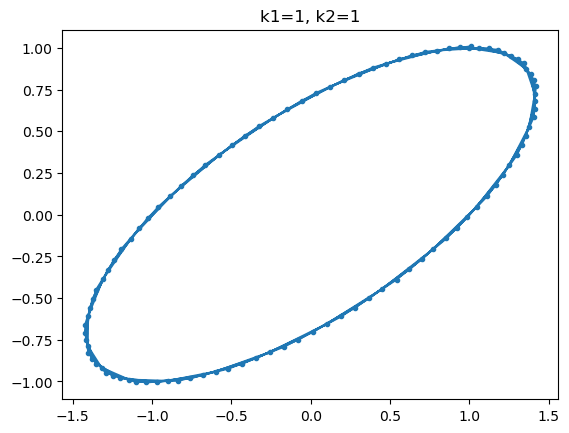

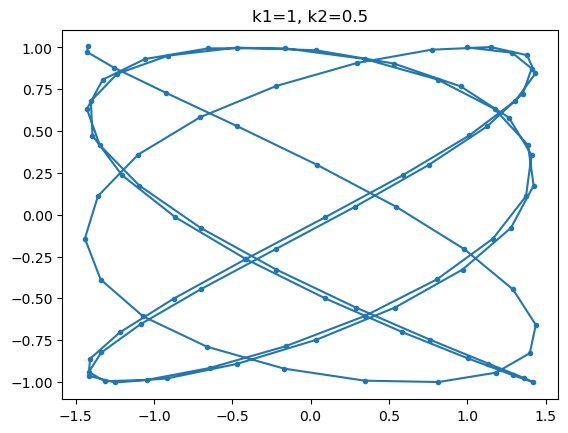

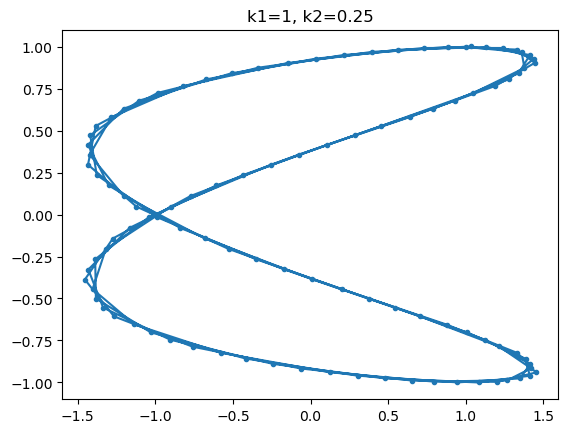

In [10]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

def func(t, x, k1, k2):
    x1, x2, v1, v2 = x[0], x[1], x[2], x[3]
    dx1dt = v1
    dx2dt = v2
    dv1dt = -k1*x1
    dv2dt = -k2*x2

    return [dx1dt, dx2dt, dv1dt, dv2dt]

for k1, k2 in zip([1,1,1],[1,1/2,1/4]):
    T = 8*np.pi*np.sqrt(1/k2)
    t = np.linspace(0,T,100)
    sol = solve_ivp(func, [0, T], [1, 1, 1, 0], t_eval=t, method='LSODA', args=(k1, k2))
    plt.plot(sol.y[0], sol.y[1], marker='.')
    plt.title(f'k1={k1}, k2={k2}')
    plt.show()



# 3 equations

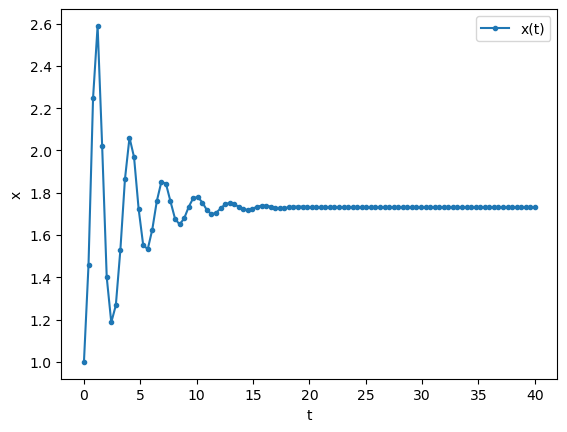

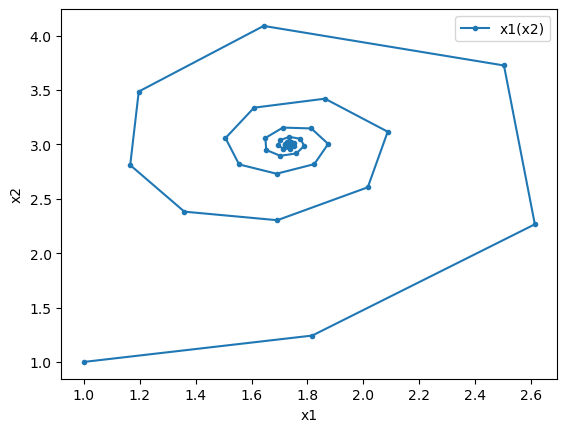

In [3]:
def func(t, x, sigma, rho, beta):
    x0,x1,x2 = x
    dx0dt = sigma*(x1 - x0)
    dx1dt = x0 * (rho - x2) - x1
    dx2dt = x0*x1 - beta*x2

    return [dx0dt, dx1dt, dx2dt]


t = np.linspace(0,40,100)
sigma, rho, beta = 5, 4, 1

sol = solve_ivp(func, [0, 40], [1, 1, 1], t_eval=t, method='LSODA', args=(sigma, rho, beta))
plt.plot(sol.t, sol.y[0], label='x(t)', marker='.')
plt.xlabel('t')
plt.ylabel('x')
plt.legend()
plt.show()

plt.plot(sol.y[1], sol.y[2], label='x1(x2)', marker='.')
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend()
plt.show()

# 3. 2nd order DE

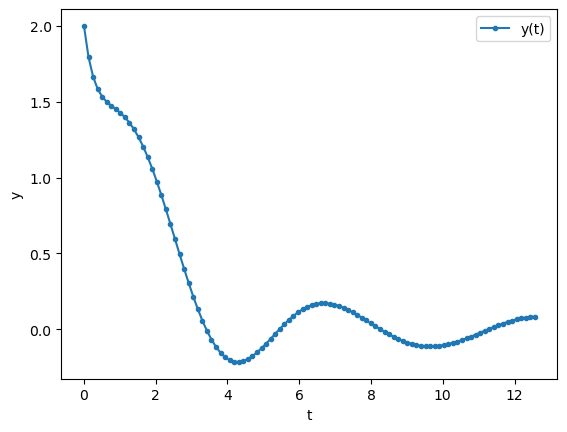

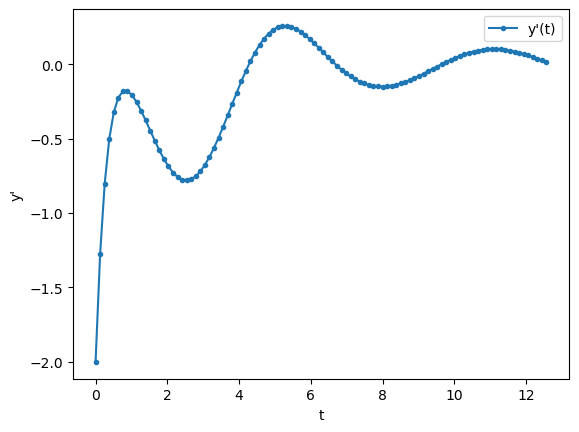

In [4]:
def func(t, x):
    y, dydt = x

    d2ydt2 = np.cos(t) - t*y - 3*dydt

    return [dydt, d2ydt2]

t = np.linspace(0,4*np.pi,100)

sol = solve_ivp(func, [0, 40], [2, -2], t_eval=t, method='LSODA')
plt.plot(sol.t, sol.y[0], label='y(t)', marker='.')
plt.xlabel('t')
plt.ylabel('y')
plt.legend()
plt.show()

plt.plot(sol.t, sol.y[1], label='y\'(t)', marker='.')
plt.xlabel('t')
plt.ylabel('y\'')
plt.legend()
plt.show()

# 4. Population of foxes and rabbits 

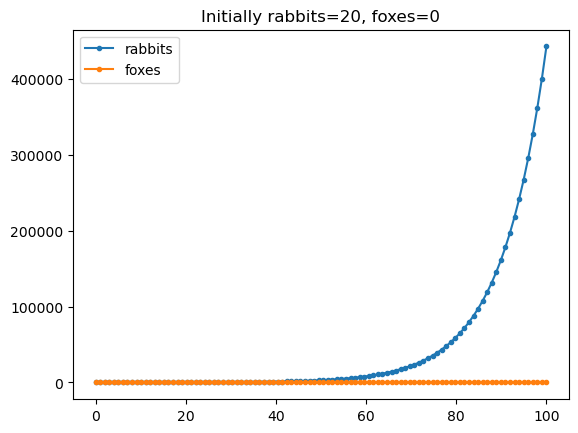

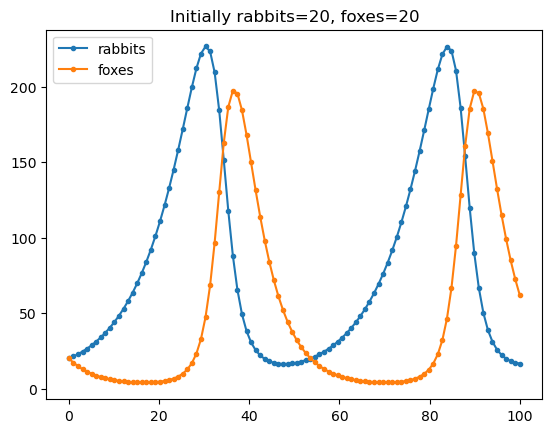

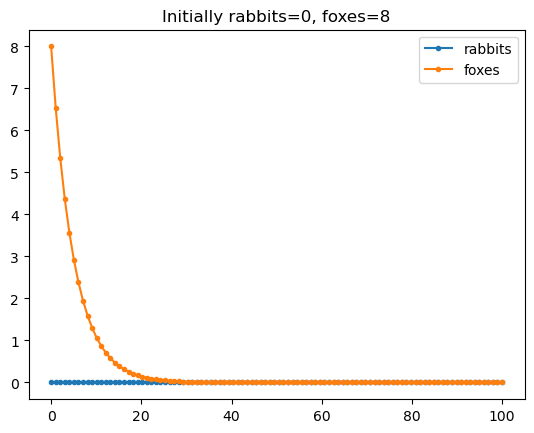

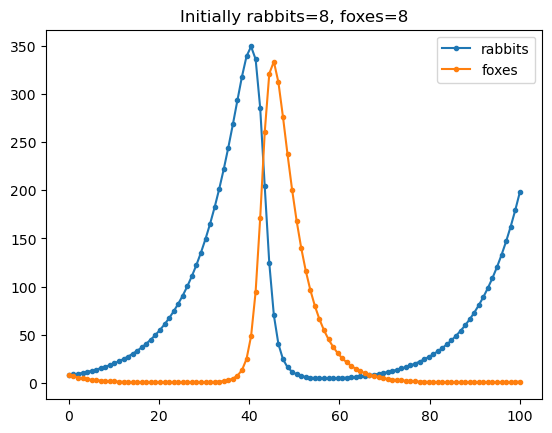

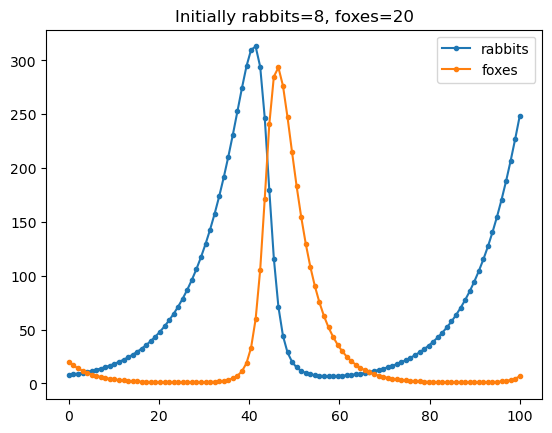

In [9]:
def func(t, x, a, b, c, d):
    r, f = x
    drdt = a*r - b*r*f
    dfdt = -c*f + d*r*f
    return [drdt, dfdt]

a, b, c, d = 0.1, 0.002, 0.2, 0.0025
for r0, f0 in zip([20, 20, 0, 8, 8],[0, 20, 8, 8, 20]):
    T = 100
    t = np.linspace(0,T,100)
    sol = solve_ivp(func, [0, T], [r0, f0], t_eval=t, method='LSODA', args=(a, b, c, d))
    plt.plot(sol.t, sol.y[0], marker='.', label='rabbits')
    plt.plot(sol.t, sol.y[1], marker='.', label='foxes')
    plt.title(f'Initially rabbits={r0}, foxes={f0}')
    plt.legend()
    plt.show()

# Challenge.

i=1,n0=1, pe0=0
i=2,n0=24977998.67306814, pe0=0.0009998783479902337
breaking at iteration 3


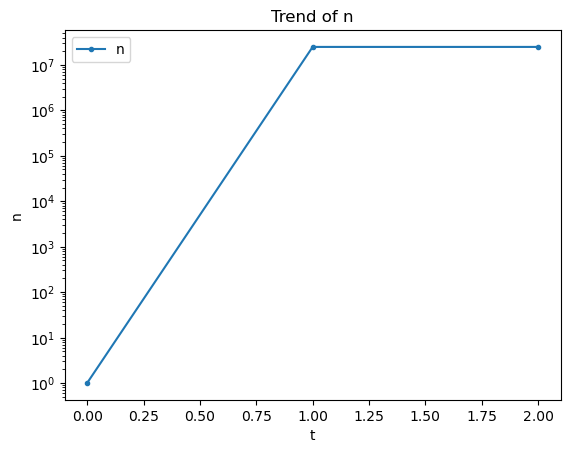

In [ ]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

def func(t, x, N, E, Gu, Gd):
    n, pe = x

    dndt = -n + N * E * (n+1) * pe
    dpedt = -(Gd + E*(n + 1)) * pe + Gu* (1 - pe)

    return [dndt, dpedt]


N, E, Gd, Gu = 1e8, 1e-5, 1/4, 1e-4/4

n0 = 1
n0list=[n0]
pe0 = 0
i=1
while True:
    print(f'i={i},n0={n0}, pe0={pe0}')
    t = np.linspace(0,20,10)
    sol = solve_ivp(func, [0, 20], [n0, pe0], t_eval=t, method='LSODA', args=(N, E, Gd, Gu))
    i += 1
    oldn0=n0
    n0, pe0 = sol.y[0][-1], sol.y[1][-1]
    n0list.append(n0)
    if i>10 or n0/oldn0 < 1.02: 
        print(f'breaking at iteration {i}')
        break
    


plt.plot(n0list, marker='.', label='n')
plt.title(f'Trend of n')
plt.xlabel('t')
plt.ylabel('n')
plt.yscale('log')
plt.legend()
plt.show()
